# Classification

There are 3 types of classification problems:
* Binary (A sample can be any of 2 classes)
* Multiclass (A sample can be any of 3 or more classes)
* Multilabel (A sample can be 1, 2, 3 or more classes at the same time)

# Imports

In [1]:
# tensorflow
import tensorflow as tf

# Basics
import numpy as np
import pandas as pd
from random import randint
import altair as alt
import matplotlib.pyplot as plt

# Custom
from sklearn.datasets import make_circles

# Functions

In [2]:
def plot_decision_boundarie(model, X, Y):
    """
    Plots the decision boundary created by a model predicting X
    """
    xmin, xmax = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    ymin, ymax = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))

    x_in = np.c_[xx.ravel(), yy.ravel()]

    yhat = model.predict(x_in)

    if len(yhat[0]) > 1:
        print("Doing multi-class classification")

        yhat = np.argmax(yhat, axis=1).reshape(xx.shape)

    else:
        print("Doing binary classification")

    yhat = np.round(yhat).reshape(xx.shape)

    plt.contourf(xx, yy, yhat, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

# Making data to fit

In [3]:
# Make artificial data
X, Y = make_circles(1000, noise=0.03, random_state=32)

# Make data frame so i can view the data
data_viz = pd.DataFrame(X, columns=["X1", "X2"])
data_viz["Y"] = Y
data_viz["Y"] =  data_viz["Y"].apply(str)

# Visualize it
alt.Chart(data_viz).mark_circle(size=60).encode(
    x="X1",
    y="X2",
    color="Y"
).interactive()

alt.Chart(...)

# Checking data shape

In [4]:
X.shape, Y.shape

((1000, 2), (1000,))

In [5]:
X[0], Y[0]

(array([-0.07257539,  0.75564179]), 1)

# Data Prep

In [6]:
# This is not necessary, but i am doing it anyway
X = tf.convert_to_tensor(X)
y = tf.convert_to_tensor(Y)

# Model making

1. Create or import a model
2. Compile it
4. Fit
4. Evaluate

5. Change model -> 4.Evaluate -> 5 -> 4 -> ...

6. Save the model

**Developing a solution**

In [7]:
# Make a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile
model_1.compile(
    # The model will try to minimize this!
    loss=tf.keras.losses.BinaryCrossentropy(),
    
    # He will "walk" into the plane of gradient descent using this method
    optimizer=tf.keras.optimizers.SGD(), 
    
    # We will see this metric wen calling "evaluate"
    metrics=["accuracy"])

# Fit
model_1.fit(X, Y, epochs=200, verbose=0)

In [8]:
# Evaluate
model_1.evaluate(X, Y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934546232223511, 0.5]

**The model is pretty bad now, its basicaly guessing**

Let's try training fow longer!

In [9]:
# Make a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

# Compile
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.SGD(), metrics=["accuracy"])

# Fit
model_2.fit(X, Y, epochs=500, verbose=0);

In [10]:
# Evaluate
model_2.evaluate(X, Y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5230


[0.6932372450828552, 0.5230000019073486]

**Still bad**

Let's improve one layer

In [11]:
# Make a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])

# Compile
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.SGD(), metrics=["accuracy"])

# Fit
model_3.fit(X, Y, epochs=500, verbose=0);

In [12]:
# Evaluate
model_3.evaluate(X, Y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933411359786987, 0.5]

**Its bad, what is the problem?**

**Improving models!**

What can we try?

- Add more layers? Already tried
- Increasing hidden units? Sorta tried when we added more layers
- Change activation function? We dont have a activation function, is that the problem? **Spoiler: YES! but lets try the other option first**
- Change optimization function? Is Adam not good enough?

In [13]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    # We changed from SGD to Adam
    optimizer=tf.keras.optimizers.Adam(), 
    
    metrics=["accuracy"])

model_3.fit(X, Y, epochs=100, verbose=0)

In [14]:
model_3.evaluate(X, Y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6959 - accuracy: 0.5000


[0.6959292888641357, 0.5]

**The model is bad**

Lets plot the model predictions in a visual way, to see what the model is doing

313/313 [==============================] - 1s 1ms/step
Doing multi-class classification


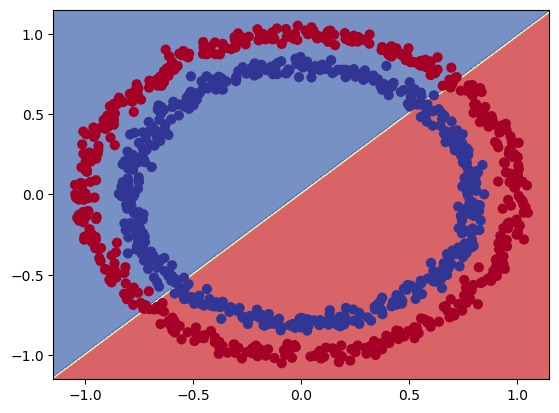

In [15]:
plot_decision_boundarie(model=model_3, X=np.array(X), Y=np.array(Y))

The model is predicting a straight line, this shows that its is not good for classification, but maybe good for predicting numbers (regression)

In [16]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    # Need to change the loos fucntion to regression
    loss=tf.keras.losses.mean_absolute_error,
    # We changed from SGD to Adam
    optimizer=tf.keras.optimizers.Adam(), 
    
    metrics=["mae"])

# Make regression data
x_reg = tf.range(0, 1000, 5)
y_reg = tf.range(100, 1100, 5) # y = x + 100

# Split train test
xtr = x_reg[:150]
xte = x_reg[150:]
ytr = y_reg[:150]
yte = y_reg[150:]

# Fit
model_3.fit(tf.expand_dims(xtr, axis=-1), ytr, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 2ms/step - loss: 344.2788 - mae: 344.2788
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 223.5097 - mae: 223.5097
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 108.3129 - mae: 108.3129
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 56.9260 - mae: 56.9260
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 79.3874 - mae: 79.3874
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 58.3918 - mae: 58.3918
Epoch 7/100
5/5 [==============================] - 0s 1ms/step - loss: 44.4347 - mae: 44.4347
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 53.2732 - mae: 53.2732
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 40.8656 - mae: 40.8656
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 44.4097 - mae: 44.4097
Epoch 11/100
5/5 [==============================] - 0

In [17]:
model_3.evaluate(tf.expand_dims(xte, axis=-1), yte)

2/2 [==============================] - 0s 2ms/step - loss: 57.0269 - mae: 57.0269


[57.0268669128418, 57.0268669128418]

## Making a good model

The problem here is non linearity, a activation function receives a certain "force" from past neurons and decides if the class is 0, 1, 2, etc... The activation functions is tunned during training, to be precise, the neuros "behind" the activation learn how much activation they need to give in order to minimize the loss function, without a activation, your predictions end up being a "non activated force", and end up looking like a regression, or, a "linear problem".

So, lets make model with activation functions!

In [4]:
# Seed
tf.random.set_seed(32)

# Make model
good_nn = tf.keras.Sequential([
    # This is normal in regression or classification problems, but here, we have activations functions to deal with "non-linearity"
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    
    # This is ABSOLUTELY NECESSARY in classifications models, in order to make past "forces" from the outher neurons being predictions from 0 to 1
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

# Compile
good_nn.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# Fit
h = good_nn.fit(X, Y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 1ms/step - loss: 0.6908 - accuracy: 0.4970
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5030
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5090
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5150
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5230
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5190
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5260
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.5240
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5260
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.5320
Epoch 11/

313/313 [==============================] - 1s 2ms/step
Doing binary classification


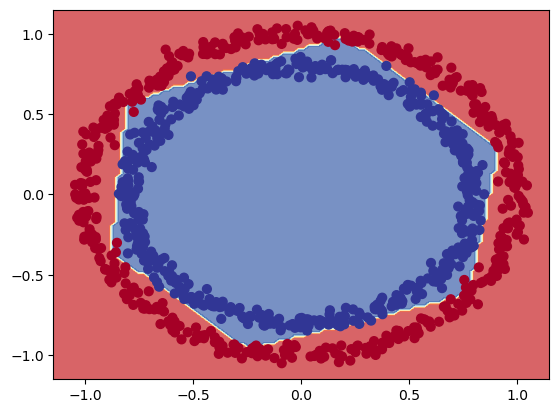

In [5]:
plot_decision_boundarie(model=good_nn, X=np.array(X), Y=np.array(Y))

Now the model have the ability of not drawing straight lines!

# Loking at the activation functions 

Linear:

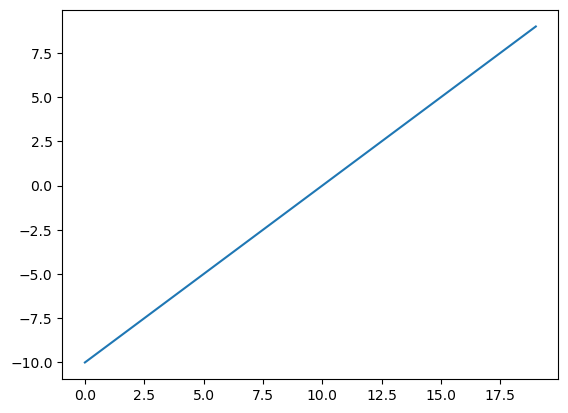

In [22]:
# Make a toy tensor
a = tf.cast(tf.range(-10, 10), tf.float32)

# See the tensor
plt.plot(a);

Sigmoid:

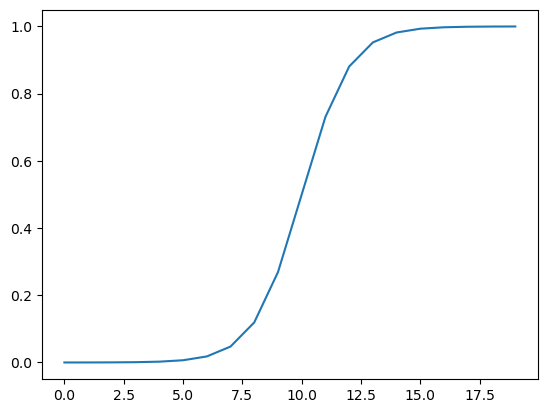

In [23]:
# Lets make a sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Lets make a tensor with this activation function
b = tf.cast([sigmoid(x) for x in range(-10, 10)], tf.float32)

# See the data
plt.plot(b);

Relu:

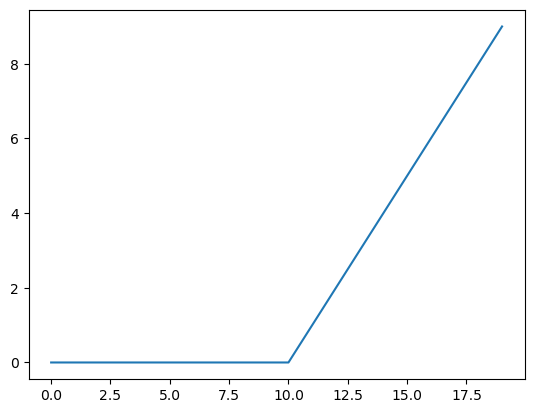

In [24]:
# Lets make a relu function
def relu(x):
    # if x is less than 0, return 0, else, return x
    return tf.maximum(0, x)

# Lets make a tensor with this activation function
c = tf.cast([relu(x) for x in range(-10, 10)], tf.float32)

# See the data
plt.plot(c);

Linear

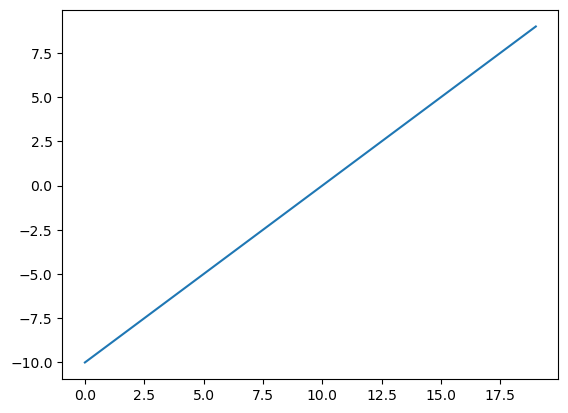

In [26]:
# Yeah, that's' it
def linear(x):
    return x

# Lets make a tensor with this activation function
d = tf.cast([linear(x) for x in range(-10, 10)], tf.float32)

# See the data
plt.plot(d);